Missing values:  age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
goal        0
dtype: int64
Duplicate values:  0
Missing values: got imputed with mean values
-----Task 1: Data exploration-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non

<ipython-input-5-b575cf92da42>:46: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


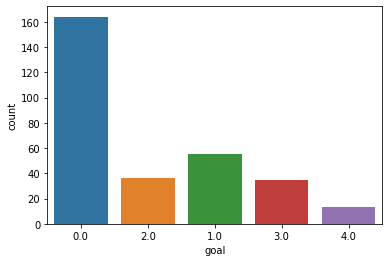

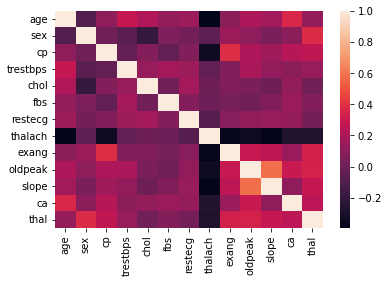

Pairplot - all features:
 Note: No need for histograms, because they are included in the pairplot (diagonal)


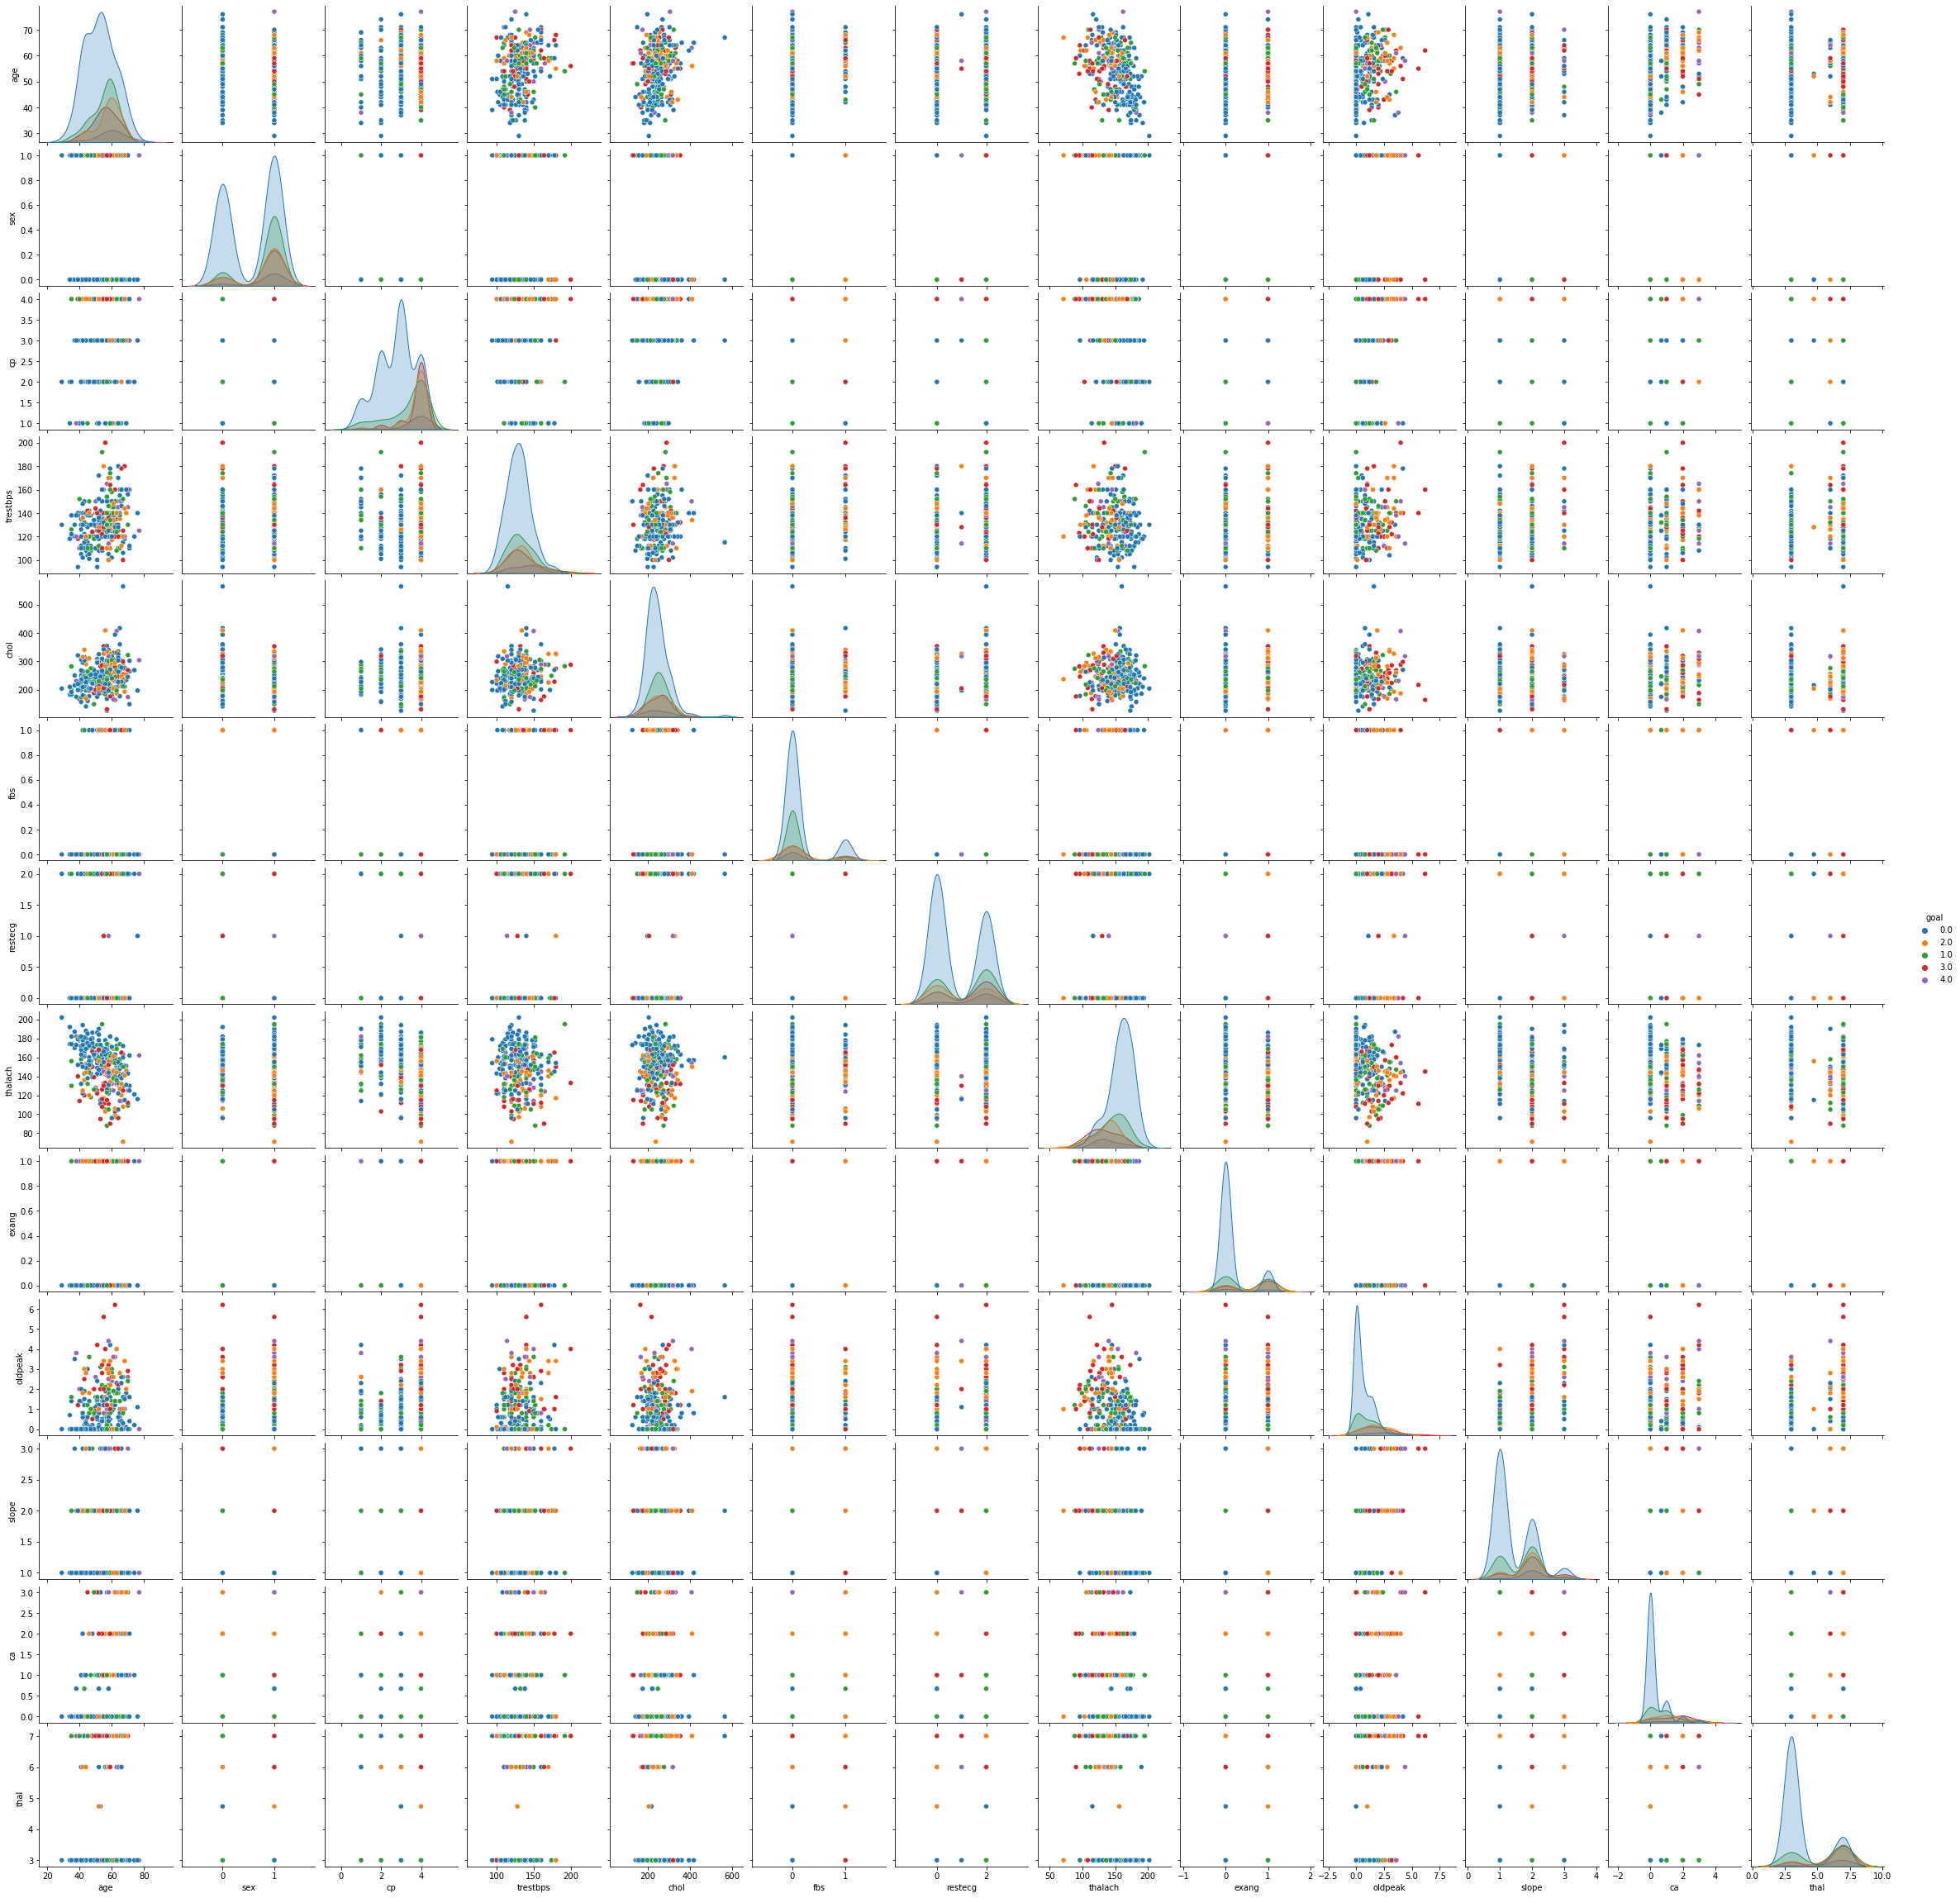

-----Task 2: Set up some classifiers and evaluate them-----
--- Model type: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>  ---
Accuracy (train):  0.6735537190082644
Accuracy (test):  0.5737704918032787
Confusion Matrix: 
 [[32  3  0  0  0]
 [ 5  1  1  1  0]
 [ 2  3  0  3  1]
 [ 0  4  0  2  0]
 [ 0  1  1  1  0]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.91      0.86        35
         1.0       0.08      0.12      0.10         8
         2.0       0.00      0.00      0.00         9
         3.0       0.29      0.33      0.31         6
         4.0       0.00      0.00      0.00         3

    accuracy                           0.57        61
   macro avg       0.24      0.27      0.25        61
weighted avg       0.51      0.57      0.54        61



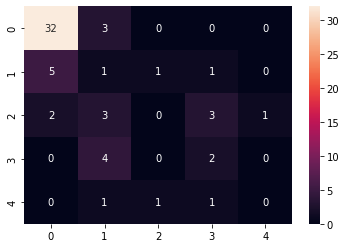

--- Model type: <class 'sklearn.linear_model._logistic.LogisticRegression'>  ---
Accuracy (train):  0.6487603305785123
Accuracy (test):  0.6229508196721312
Confusion Matrix: 
 [[32  2  0  0  1]
 [ 5  2  1  0  0]
 [ 1  1  2  5  0]
 [ 0  3  1  2  0]
 [ 0  1  0  2  0]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.88        35
         1.0       0.22      0.25      0.24         8
         2.0       0.50      0.22      0.31         9
         3.0       0.22      0.33      0.27         6
         4.0       0.00      0.00      0.00         3

    accuracy                           0.62        61
   macro avg       0.36      0.34      0.34        61
weighted avg       0.61      0.62      0.61        61



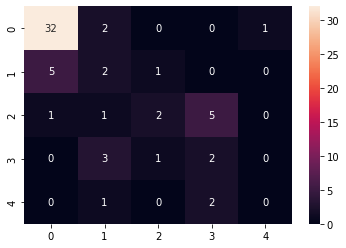

--- Model type: <class 'sklearn.tree._classes.DecisionTreeClassifier'>  ---
Accuracy (train):  1.0
Accuracy (test):  0.6065573770491803
Confusion Matrix: 
 [[31  1  2  0  1]
 [ 3  3  1  1  0]
 [ 1  3  2  2  1]
 [ 1  2  1  1  1]
 [ 0  0  1  2  0]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.87        35
         1.0       0.33      0.38      0.35         8
         2.0       0.29      0.22      0.25         9
         3.0       0.17      0.17      0.17         6
         4.0       0.00      0.00      0.00         3

    accuracy                           0.61        61
   macro avg       0.33      0.33      0.33        61
weighted avg       0.60      0.61      0.60        61



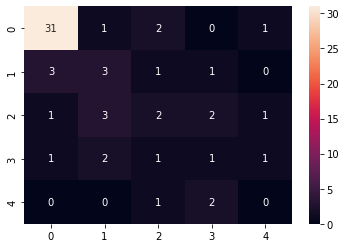

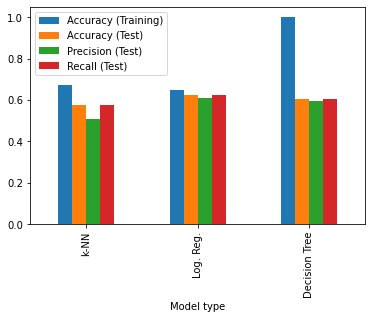

-----Task 4: ROC curves for a binary outcome-----
-----Task 5: Overleaf-Template is set up-----


In [5]:
#from __future__ import print_function, division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, glob, sys, gc
import random # for reproducibility 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm


# set seeds for reproducibility
def set_seeds(seed = 1129142087):
    random.seed(seed)
    np.random.seed(seed+1)
    print('Seeds set to {}.'.format(seed))
    return

# read the data
def read_data(filename):
    df = pd.read_csv(filename)
    return df

# replace '?' with None
def impute_question_marks(df):
    df.replace('?', None, inplace=True)
    # convert data type of all columns to float
    df = df.astype(float)
    # goal is a categorical variable, so convert it to str for better visualization in pairplot etc.
    df.goal = df.goal.astype(str)
    print("Missing values: ", df.isnull().sum())
    print("Duplicate values: ", df.duplicated().sum())
    # impute missing values with mean
    df.fillna(df.mean(), inplace=True)
    return df

# check the data
def check_data(df):
    #print(df.head())
    print(df.info())
    print(df.describe())
    return

# check the correlation
def check_corr(df):
    corr = df.corr()
    print(corr)
    return

# check the distribution of the data
def check_dist(df):
    sns.countplot(x='goal', data=df)
    plt.show()
    return

# check the pairplot
def check_pairplot(df):
    print("Pairplot - all features:\n Warning: This may take a while...\n Note: No need for histograms, because they are included in the pairplot (diagonal)") 
    sns.pairplot(df, hue='goal')
    plt.show()
    return

# check the heatmap
def check_heatmap(df):
    corr = df.corr()
    sns.heatmap(corr)
    plt.show()
    return

# split the data into train and test
# return train and test dataframes
def split_data(df, test_size=0.2, random_state=12542068):
    train_df = df.sample(frac=1-test_size, random_state=random_state)
    test_df = df.drop(train_df.index)
    return train_df, test_df

def get_features_and_labels(df, features=[], label="goal", use_MM_scaler=True):
    # split the data into train and test
    # return train and test dataframes
    train_df, test_df = split_data(df)
    if not features:
        train_features = train_df.drop(columns=label)
        test_features = test_df.drop(columns=label)
    else: 
        train_features = train_df[features]
        test_features = test_df[features]
    train_labels = train_df[label]
    test_labels = test_df[label]
    # Scale the data to (0..1)
    if use_MM_scaler:
        scaler = MinMaxScaler()
        _ = scaler.fit_transform(train_df)
        train_features = scaler.fit_transform(train_features)
        test_features = scaler.transform(test_features)
    return train_features, train_labels, test_features, test_labels

# why no PCA? I mean, srsly?! i would be a great introduction to the data, 
# but with low correlation comes lower interpretability of pcas, or something like that. 
# Task 2: Set up some classifiers and evaluate them
# Evaluation as plots: Accuracy, Sensitivity&Sepcificity (aka Precision&Recall?), 
# NOTE: please use the F1-Score for unbalanced classes 
def logistic_regression(train_features, train_labels):
    # apply logistic regression
    logreg = LogisticRegression()
    logreg.fit(train_features, train_labels)
    print("--- Model type:", type(logreg), " ---")
    print("Accuracy (train): ", logreg.score(train_features, train_labels))
    return logreg

# k-NN
def k_nearest_neighbors(train_features, train_labels):
    # apply k-nn
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(train_features, train_labels)
    print("--- Model type:", type(knn), " ---")
    print("Accuracy (train): ", knn.score(train_features, train_labels))
    return knn

# decision tree
def decision_tree(train_features, train_labels):
    dec_tree = DecisionTreeClassifier()
    dec_tree.fit(train_features, train_labels)
    print("--- Model type:", type(dec_tree), " ---")
    print("Accuracy (train): ", dec_tree.score(train_features, train_labels))
    return dec_tree

# neural network
def neural_network(train_features, train_labels):
    # not in use for now. wrong hyperparameters. But there exists a neural network in sklearn
    resnet = MLPClassifier(hidden_layer_sizes=(32, 32, 16), max_iter=100)
    resnet.fit(train_features, train_labels)
    print("--- Model type:", type(resnet), " ---")
    print("Accuracy (train): ", resnet.score(train_features, train_labels))
    return resnet


def test_model(model, test_features, test_labels):
    # predict the test data
    pred = model.predict(test_features)
    # evaluate the model
    print("Accuracy (test): ", accuracy_score(test_labels, pred))
    print("Confusion Matrix: \n", confusion_matrix(test_labels, pred))
    print("Classification Report: \n", classification_report(test_labels, pred))
    # heatmap of confusion matrix
    sns.heatmap(confusion_matrix(test_labels, pred), annot=True, fmt='d')
    plt.show()
    return pred

def plot_accuracies(models, model_names, train_features, train_labels, test_features, test_labels):
    # Plot the accuracy of the models in a bar chart
    # use train and test accuracy for the bar chart (for each model)
    train_acc = [model.score(train_features, train_labels) for model in models]
    test_acc = [accuracy_score(test_labels, model.predict(test_features)) for model in models]
    overall_acc = pd.DataFrame({"Model type": model_names, "Accuracy (Training)": train_acc, "Accuracy (Test)": test_acc})
    overall_acc.plot.bar(x="Model type", y=["Accuracy (Training)", "Accuracy (Test)"])  # type: ignore
    plt.show()

def plot_precision(models, model_names, test_features, test_labels):
    # Plot the precision of the models in a bar chart
    # use test precision for the bar chart (for each model)
    precision = [precision_score(test_labels, model.predict(test_features), average="weighted") for model in models]
    overall_precision = pd.DataFrame({"Model type": model_names, "Precision": precision})
    overall_precision.plot.bar(x="Model type", y="Precision")  # type: ignore
    plt.show()

def plot_recall(models, model_names, test_features, test_labels):
    # Plot the recall of the models in a bar chart
    # use test recall for the bar chart (for each model)
    recall = [recall_score(test_labels, model.predict(test_features), average="weighted") for model in models]
    overall_recall = pd.DataFrame({"Model type": model_names, "Recall": recall})
    overall_recall.plot.bar(x="Model type", y="Recall")  # type: ignore
    plt.show()

def plot_acc_prec_rec(models, model_names, train_features, train_labels, test_features, test_labels):
    # Plot the accuracy, precision and recall of the models in a bar chart
    # use train and test accuracy, precision and recall for the bar chart (for each model)
    train_acc = [model.score(train_features, train_labels) for model in models]
    test_acc = [accuracy_score(test_labels, model.predict(test_features)) for model in models]
    precision = [precision_score(test_labels, model.predict(test_features), average="weighted") for model in models]
    recall = [recall_score(test_labels, model.predict(test_features), average="weighted") for model in models]
    overall_acc_prec_rec = pd.DataFrame({"Model type": model_names, "Accuracy (Training)": train_acc, "Accuracy (Test)": test_acc, "Precision (Test)": precision, "Recall (Test)": recall})
    overall_acc_prec_rec.plot.bar(x="Model type", y=["Accuracy (Training)", "Accuracy (Test)", "Precision (Test)", "Recall (Test)"])  # type: ignore
    plt.show()

def roc_auc(models, model_names, test_features, test_labels):
    # Plot a ROC curve for each model (use test data) 
    # Add the AUC to the plot
    for model in tqdm(models, desc="Plotting ROC-AUC"):
        plot_roc_curve(model, test_features, test_labels)
        # Add the model name to the plot
        plt.title(model_names[models.index(model)])
        plt.show()


# TODO: run it again after binarization of goal 
# task 3: same again, but all !=0 goal-values are set to 1. No need for F1-Score anymore.
# makes sense, 'cause binary classification is easier than multi-class classification, if the features tend to be the same for all goal > 1
def set_goal_to_binary(df):
    df.goal = df.goal.apply(lambda x: "1" if x!="0.0" else "0")
    df.goal = df.goal.astype("int")
    return df

# task 5: Report and presentation 

# ------------------ main ------------------
# main function
if __name__ == '__main__':
    # read the data
    df = read_data('./../data/processedWithHeader.cleveland.data')
    # replace '?' with None, check for missings, and impute missing values with mean
    df = impute_question_marks(df)
    print("Missing values: got imputed with mean values")
    
    # Task 3:
    # Set this to 'True' for task 3 and run the whole code again
    binary_outcome=False
    if binary_outcome:
        df = set_goal_to_binary(df)
    
    # Task 1: Data exploration
    print("-----Task 1: Data exploration-----")
    # check the data
    check_data(df)
    # check the correlation
    check_corr(df)
    # check the distribution of the data regarding the goal
    check_dist(df)
    # check the heatmap
    check_heatmap(df)
    # check the pairplot (this takes a while!)
    check_pairplot(df)

    # Task 2: Set up some classifiers and evaluate them
    print("-----Task 2: Set up some classifiers and evaluate them-----")
    train_features, train_labels, test_features, test_labels = get_features_and_labels(df)

    # knn classifier
    knn = k_nearest_neighbors(train_features, train_labels)
    # evaluate the model
    knn_pred = test_model(knn, test_features, test_labels)

    # logistic regression
    logreg = logistic_regression(train_features, train_labels)
    # evaluate the model
    logreg_pred = test_model(logreg, test_features, test_labels)

    # decision tree
    dec_tree = decision_tree(train_features, train_labels)
    # evaluate the model
    dec_tree_pred = test_model(dec_tree, test_features, test_labels)

    # plot the accuracies of the models
    models = [knn, logreg, dec_tree]
    model_names = ["k-NN", "Log. Reg.", "Decision Tree"]
    #plot_accuracies(models, model_names, train_features, train_labels, test_features, test_labels)
    # plot the precision of the models
    #plot_precision(models, model_names, test_features, test_labels)
    # plot the recall of the models
    #plot_recall(models, model_names, test_features, test_labels)

    plot_acc_prec_rec(models, model_names, train_features, train_labels, test_features, test_labels)

    # Task 4: ROC curves
    print("-----Task 4: ROC curves for a binary outcome-----")
    # plot the ROC-AUC of the models
    if binary_outcome:
        roc_auc(models, model_names, test_features, test_labels)

    # Task 5: Set up a report-template
    print("-----Task 5: Overleaf-Template is set up-----")

In [6]:
print("-----Task 3: All again, after 'goal' was transformed to a binary outcome-----")

-----Task 3: All again, after 'goal' was transformed to a binary outcome-----


Missing values:  age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
goal        0
dtype: int64
Duplicate values:  0
Missing values: got imputed with mean values
-----Task 1: Data exploration-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non

<ipython-input-7-78f24bad9872>:46: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


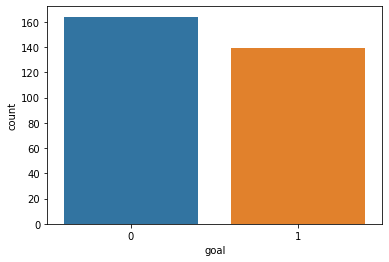

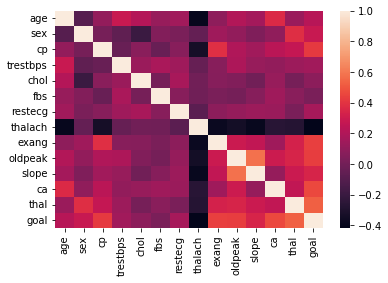

Pairplot - all features:
 Note: No need for histograms, because they are included in the pairplot (diagonal)


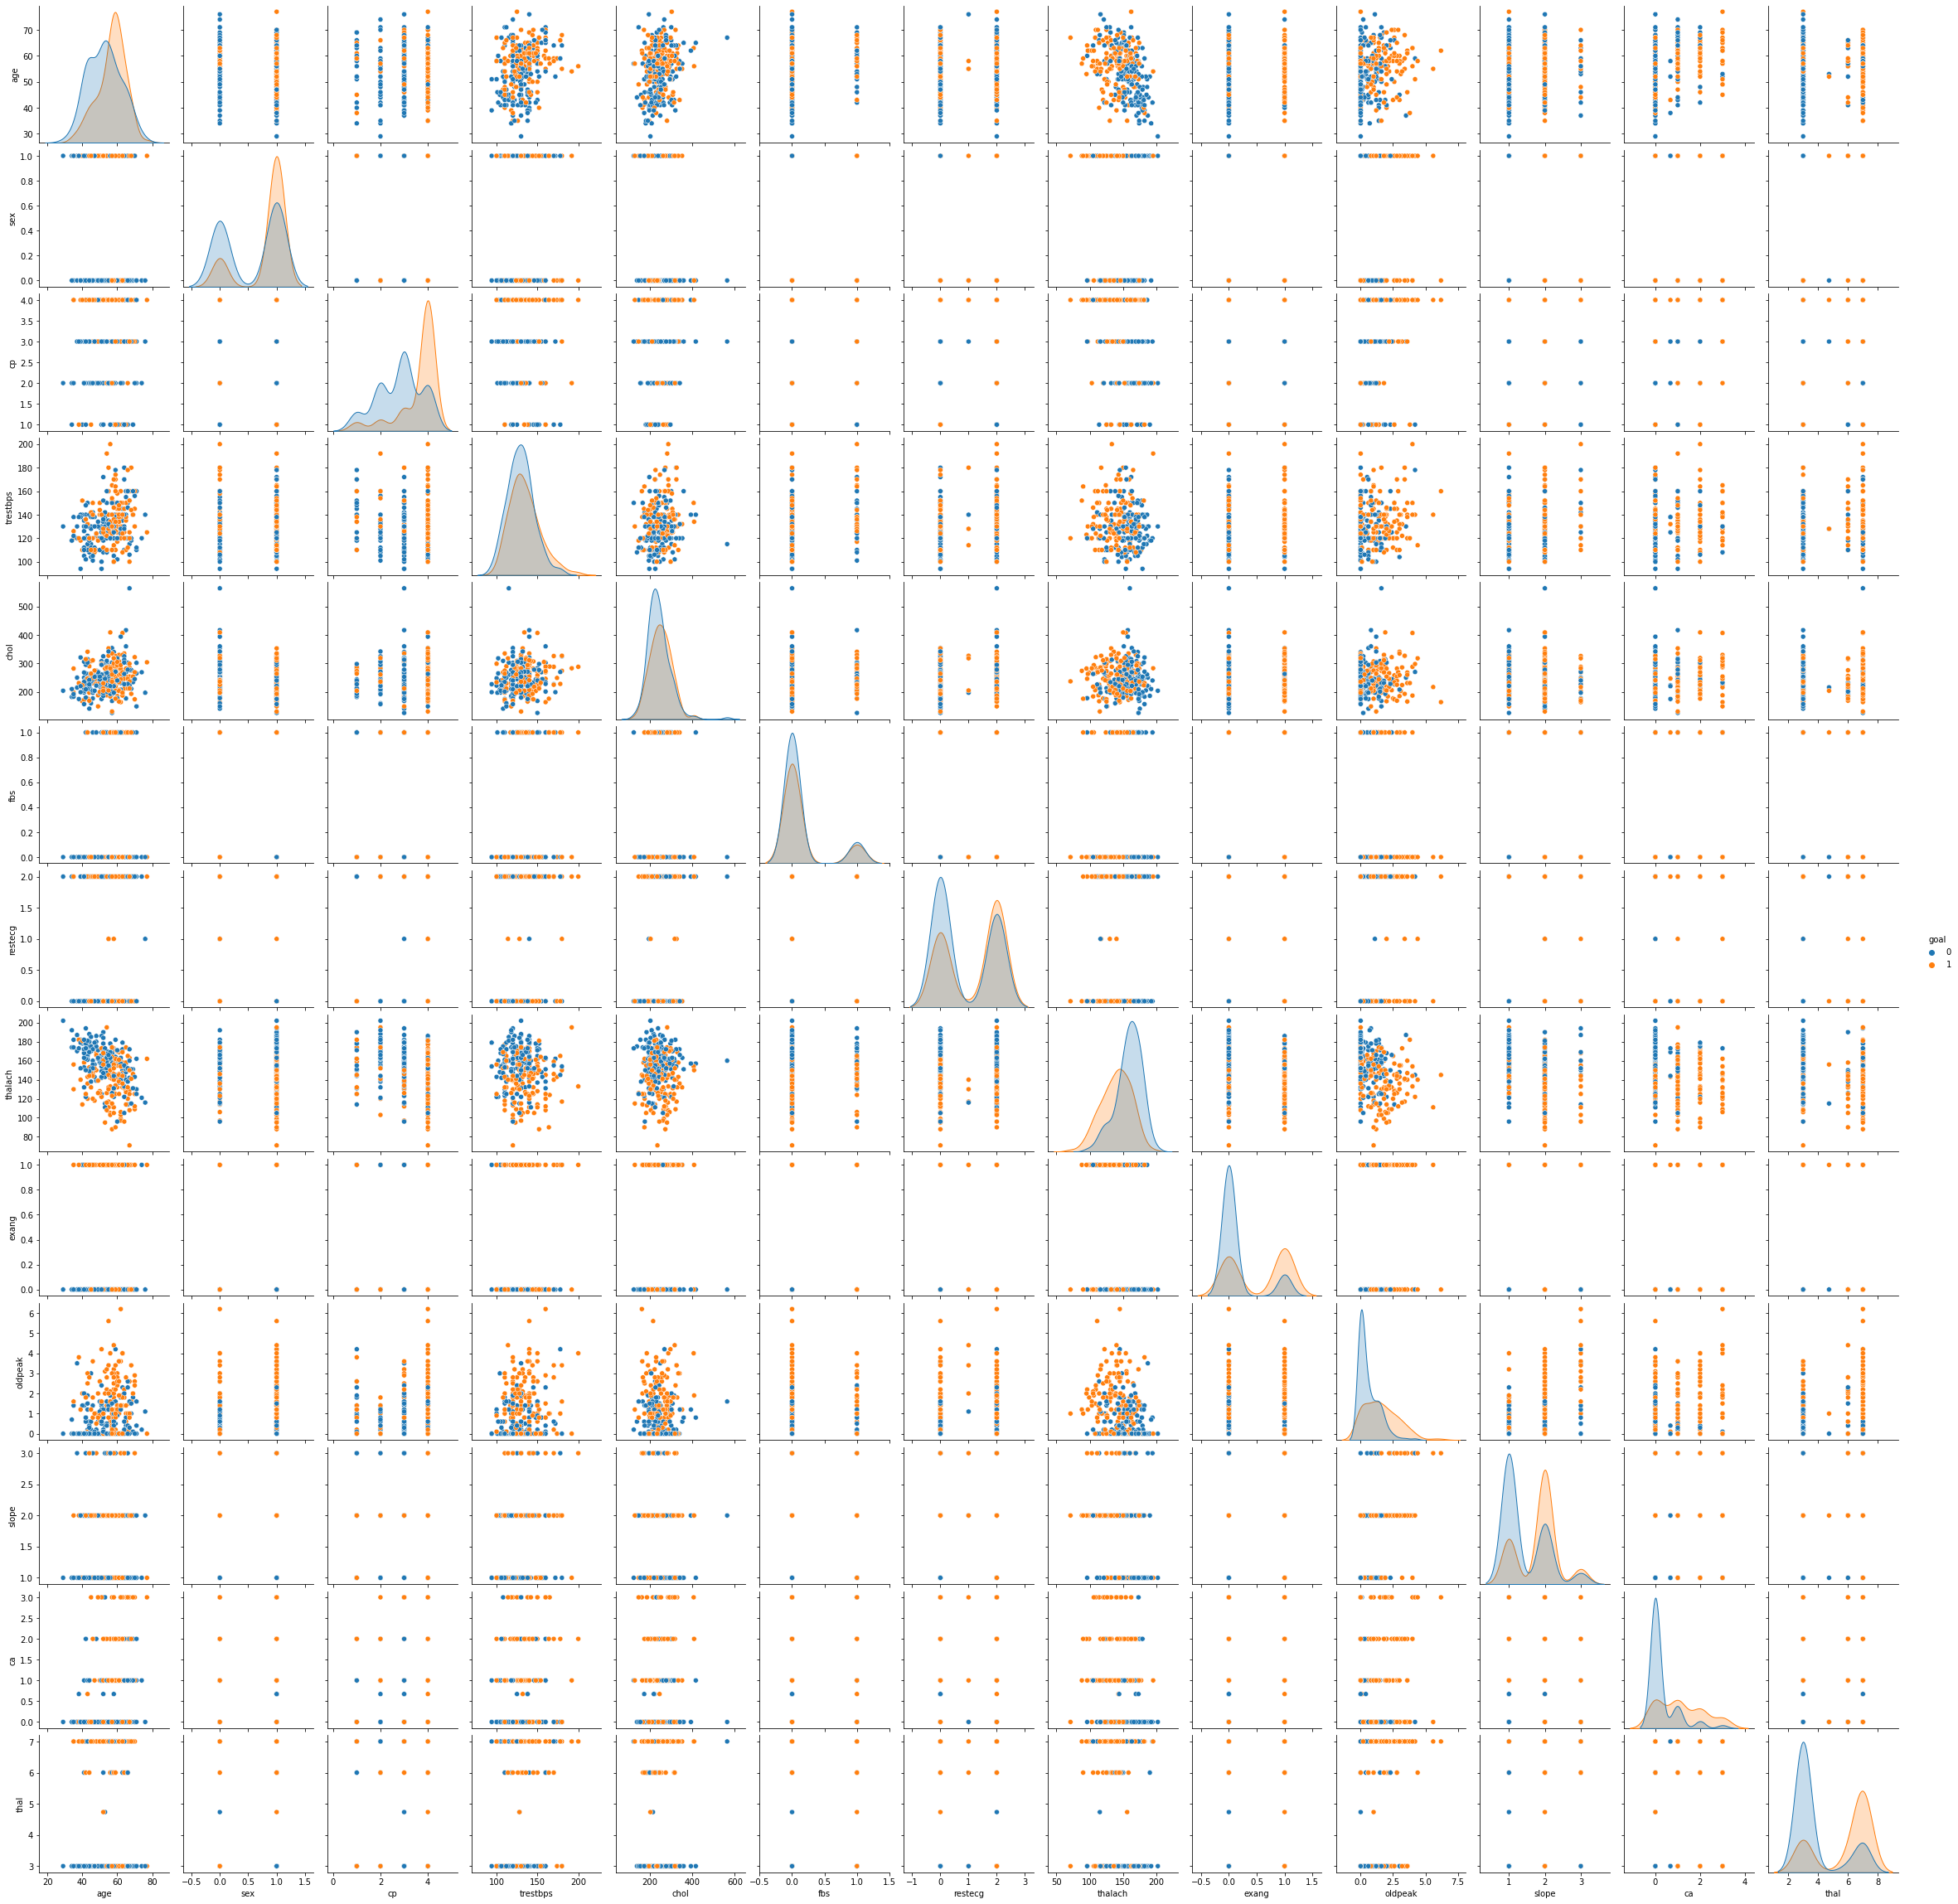

-----Task 2: Set up some classifiers and evaluate them-----
--- Model type: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>  ---
Accuracy (train):  0.8388429752066116
Accuracy (test):  0.8524590163934426
Confusion Matrix: 
 [[31  4]
 [ 5 21]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.84      0.81      0.82        26

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



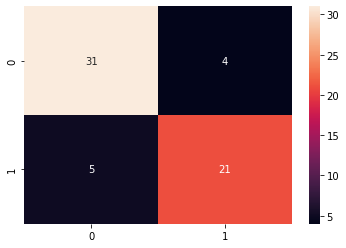

--- Model type: <class 'sklearn.linear_model._logistic.LogisticRegression'>  ---
Accuracy (train):  0.8471074380165289
Accuracy (test):  0.8688524590163934
Confusion Matrix: 
 [[32  3]
 [ 5 21]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.89        35
           1       0.88      0.81      0.84        26

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



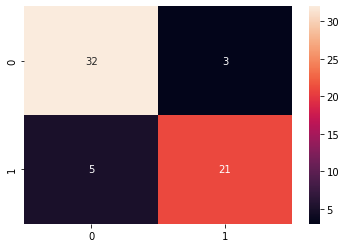

--- Model type: <class 'sklearn.tree._classes.DecisionTreeClassifier'>  ---
Accuracy (train):  1.0
Accuracy (test):  0.819672131147541
Confusion Matrix: 
 [[30  5]
 [ 6 20]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.80      0.77      0.78        26

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



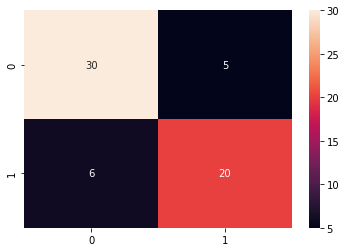

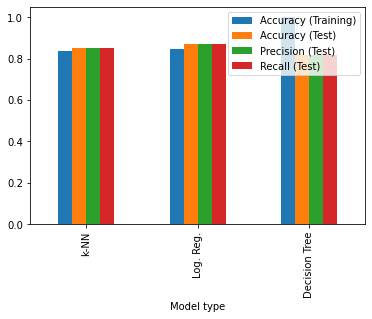

-----Task 4: ROC curves for a binary outcome-----


Plotting ROC-AUC:   0%|          | 0/3 [00:00<?, ?it/s]c:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


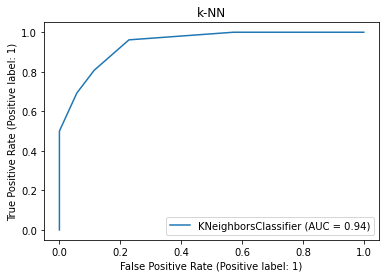

Plotting ROC-AUC:  33%|███▎      | 1/3 [00:00<00:00,  8.02it/s]c:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


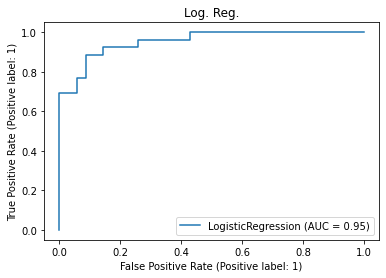

Plotting ROC-AUC:  67%|██████▋   | 2/3 [00:00<00:00,  7.77it/s]c:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


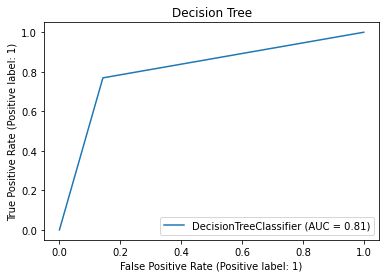

Plotting ROC-AUC: 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]

-----Task 5: Overleaf-Template is set up-----


In [7]:
#from __future__ import print_function, division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, glob, sys, gc
import random # for reproducibility 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm


# set seeds for reproducibility
def set_seeds(seed = 1129142087):
    random.seed(seed)
    np.random.seed(seed+1)
    print('Seeds set to {}.'.format(seed))
    return

# read the data
def read_data(filename):
    df = pd.read_csv(filename)
    return df

# replace '?' with None
def impute_question_marks(df):
    df.replace('?', None, inplace=True)
    # convert data type of all columns to float
    df = df.astype(float)
    # goal is a categorical variable, so convert it to str for better visualization in pairplot etc.
    df.goal = df.goal.astype(str)
    print("Missing values: ", df.isnull().sum())
    print("Duplicate values: ", df.duplicated().sum())
    # impute missing values with mean
    df.fillna(df.mean(), inplace=True)
    return df

# check the data
def check_data(df):
    #print(df.head())
    print(df.info())
    print(df.describe())
    return

# check the correlation
def check_corr(df):
    corr = df.corr()
    print(corr)
    return

# check the distribution of the data
def check_dist(df):
    sns.countplot(x='goal', data=df)
    plt.show()
    return

# check the pairplot
def check_pairplot(df):
    print("Pairplot - all features:\n Warning: This may take a while...\n Note: No need for histograms, because they are included in the pairplot (diagonal)") 
    sns.pairplot(df, hue='goal')
    plt.show()
    return

# check the heatmap
def check_heatmap(df):
    corr = df.corr()
    sns.heatmap(corr)
    plt.show()
    return

# split the data into train and test
# return train and test dataframes
def split_data(df, test_size=0.2, random_state=12542068):
    train_df = df.sample(frac=1-test_size, random_state=random_state)
    test_df = df.drop(train_df.index)
    return train_df, test_df

def get_features_and_labels(df, features=[], label="goal", use_MM_scaler=True):
    # split the data into train and test
    # return train and test dataframes
    train_df, test_df = split_data(df)
    if not features:
        train_features = train_df.drop(columns=label)
        test_features = test_df.drop(columns=label)
    else: 
        train_features = train_df[features]
        test_features = test_df[features]
    train_labels = train_df[label]
    test_labels = test_df[label]
    # Scale the data to (0..1)
    if use_MM_scaler:
        scaler = MinMaxScaler()
        _ = scaler.fit_transform(train_df)
        train_features = scaler.fit_transform(train_features)
        test_features = scaler.transform(test_features)
    return train_features, train_labels, test_features, test_labels

# why no PCA? I mean, srsly?! i would be a great introduction to the data, 
# but with low correlation comes lower interpretability of pcas, or something like that. 
# Task 2: Set up some classifiers and evaluate them
# Evaluation as plots: Accuracy, Sensitivity&Sepcificity (aka Precision&Recall?), 
# NOTE: please use the F1-Score for unbalanced classes 
def logistic_regression(train_features, train_labels):
    # apply logistic regression
    logreg = LogisticRegression()
    logreg.fit(train_features, train_labels)
    print("--- Model type:", type(logreg), " ---")
    print("Accuracy (train): ", logreg.score(train_features, train_labels))
    return logreg

# k-NN
def k_nearest_neighbors(train_features, train_labels):
    # apply k-nn
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(train_features, train_labels)
    print("--- Model type:", type(knn), " ---")
    print("Accuracy (train): ", knn.score(train_features, train_labels))
    return knn

# decision tree
def decision_tree(train_features, train_labels):
    dec_tree = DecisionTreeClassifier()
    dec_tree.fit(train_features, train_labels)
    print("--- Model type:", type(dec_tree), " ---")
    print("Accuracy (train): ", dec_tree.score(train_features, train_labels))
    return dec_tree

# neural network
def neural_network(train_features, train_labels):
    # not in use for now. wrong hyperparameters. But there exists a neural network in sklearn
    resnet = MLPClassifier(hidden_layer_sizes=(32, 32, 16), max_iter=100)
    resnet.fit(train_features, train_labels)
    print("--- Model type:", type(resnet), " ---")
    print("Accuracy (train): ", resnet.score(train_features, train_labels))
    return resnet


def test_model(model, test_features, test_labels):
    # predict the test data
    pred = model.predict(test_features)
    # evaluate the model
    print("Accuracy (test): ", accuracy_score(test_labels, pred))
    print("Confusion Matrix: \n", confusion_matrix(test_labels, pred))
    print("Classification Report: \n", classification_report(test_labels, pred))
    # heatmap of confusion matrix
    sns.heatmap(confusion_matrix(test_labels, pred), annot=True, fmt='d')
    plt.show()
    return pred

def plot_accuracies(models, model_names, train_features, train_labels, test_features, test_labels):
    # Plot the accuracy of the models in a bar chart
    # use train and test accuracy for the bar chart (for each model)
    train_acc = [model.score(train_features, train_labels) for model in models]
    test_acc = [accuracy_score(test_labels, model.predict(test_features)) for model in models]
    overall_acc = pd.DataFrame({"Model type": model_names, "Accuracy (Training)": train_acc, "Accuracy (Test)": test_acc})
    overall_acc.plot.bar(x="Model type", y=["Accuracy (Training)", "Accuracy (Test)"])  # type: ignore
    plt.show()

def plot_precision(models, model_names, test_features, test_labels):
    # Plot the precision of the models in a bar chart
    # use test precision for the bar chart (for each model)
    precision = [precision_score(test_labels, model.predict(test_features), average="weighted") for model in models]
    overall_precision = pd.DataFrame({"Model type": model_names, "Precision": precision})
    overall_precision.plot.bar(x="Model type", y="Precision")  # type: ignore
    plt.show()

def plot_recall(models, model_names, test_features, test_labels):
    # Plot the recall of the models in a bar chart
    # use test recall for the bar chart (for each model)
    recall = [recall_score(test_labels, model.predict(test_features), average="weighted") for model in models]
    overall_recall = pd.DataFrame({"Model type": model_names, "Recall": recall})
    overall_recall.plot.bar(x="Model type", y="Recall")  # type: ignore
    plt.show()

def plot_acc_prec_rec(models, model_names, train_features, train_labels, test_features, test_labels):
    # Plot the accuracy, precision and recall of the models in a bar chart
    # use train and test accuracy, precision and recall for the bar chart (for each model)
    train_acc = [model.score(train_features, train_labels) for model in models]
    test_acc = [accuracy_score(test_labels, model.predict(test_features)) for model in models]
    precision = [precision_score(test_labels, model.predict(test_features), average="weighted") for model in models]
    recall = [recall_score(test_labels, model.predict(test_features), average="weighted") for model in models]
    overall_acc_prec_rec = pd.DataFrame({"Model type": model_names, "Accuracy (Training)": train_acc, "Accuracy (Test)": test_acc, "Precision (Test)": precision, "Recall (Test)": recall})
    overall_acc_prec_rec.plot.bar(x="Model type", y=["Accuracy (Training)", "Accuracy (Test)", "Precision (Test)", "Recall (Test)"])  # type: ignore
    plt.show()

def roc_auc(models, model_names, test_features, test_labels):
    # Plot a ROC curve for each model (use test data) 
    # Add the AUC to the plot
    for model in tqdm(models, desc="Plotting ROC-AUC"):
        plot_roc_curve(model, test_features, test_labels)
        # Add the model name to the plot
        plt.title(model_names[models.index(model)])
        plt.show()


# TODO: run it again after binarization of goal 
# task 3: same again, but all !=0 goal-values are set to 1. No need for F1-Score anymore.
# makes sense, 'cause binary classification is easier than multi-class classification, if the features tend to be the same for all goal > 1
def set_goal_to_binary(df):
    df.goal = df.goal.apply(lambda x: "1" if x!="0.0" else "0")
    df.goal = df.goal.astype("int")
    return df

# task 5: Report and presentation 

# ------------------ main ------------------
# main function
if __name__ == '__main__':
    # read the data
    df = read_data('./../data/processedWithHeader.cleveland.data')
    # replace '?' with None, check for missings, and impute missing values with mean
    df = impute_question_marks(df)
    print("Missing values: got imputed with mean values")
    
    # Task 3:
    # Set this to 'True' for task 3 and run the whole code again
    binary_outcome=True
    if binary_outcome:
        df = set_goal_to_binary(df)
    
    # Task 1: Data exploration
    print("-----Task 1: Data exploration-----")
    # check the data
    check_data(df)
    # check the correlation
    check_corr(df)
    # check the distribution of the data regarding the goal
    check_dist(df)
    # check the heatmap
    check_heatmap(df)
    # check the pairplot (this takes a while!)
    check_pairplot(df)

    # Task 2: Set up some classifiers and evaluate them
    print("-----Task 2: Set up some classifiers and evaluate them-----")
    train_features, train_labels, test_features, test_labels = get_features_and_labels(df)

    # knn classifier
    knn = k_nearest_neighbors(train_features, train_labels)
    # evaluate the model
    knn_pred = test_model(knn, test_features, test_labels)

    # logistic regression
    logreg = logistic_regression(train_features, train_labels)
    # evaluate the model
    logreg_pred = test_model(logreg, test_features, test_labels)

    # decision tree
    dec_tree = decision_tree(train_features, train_labels)
    # evaluate the model
    dec_tree_pred = test_model(dec_tree, test_features, test_labels)

    # plot the accuracies of the models
    models = [knn, logreg, dec_tree]
    model_names = ["k-NN", "Log. Reg.", "Decision Tree"]
    #plot_accuracies(models, model_names, train_features, train_labels, test_features, test_labels)
    # plot the precision of the models
    #plot_precision(models, model_names, test_features, test_labels)
    # plot the recall of the models
    #plot_recall(models, model_names, test_features, test_labels)

    plot_acc_prec_rec(models, model_names, train_features, train_labels, test_features, test_labels)

    # Task 4: ROC curves
    print("-----Task 4: ROC curves for a binary outcome-----")
    # plot the ROC-AUC of the models
    if binary_outcome:
        roc_auc(models, model_names, test_features, test_labels)

    # Task 5: Set up a report-template
    print("-----Task 5: Overleaf-Template is set up-----")